In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
from matplotlib import pyplot as plt

from astropy.table import Table, vstack
from sn_analysis import reference
from sn_analysis.modeling import get_model_with_pwv, calc_x0_for_z
from sn_analysis.utils import register_decam_filters

register_decam_filters(force=True)


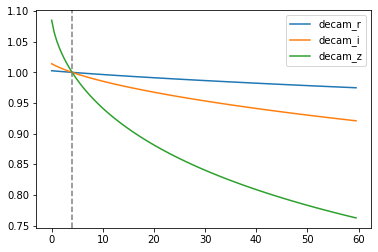

In [2]:
ref_df = reference.get_ref_star_dataframe()

for band in 'riz':
    plt.plot(ref_df.index, ref_df[f'decam_{band}_norm'], label=f'decam_{band}')
    
plt.axvline(4, color='grey', linestyle='--')
plt.legend()


In [3]:
def sim_lc(source='salt2-extended', snr=.1, **kwargs):
    model = get_model_with_pwv(source)
    model.update(kwargs)

    band_sim_data = []
    time_arr = np.arange(-20, 50)
    for band in 'riz':
        flux = model.bandflux(f'decam_{band}', time_arr, zpsys='ab', zp=25)
        band_data = Table([time_arr, flux], names=['time', 'flux'])
        band_data['band'] = f'decam_{band}'
        band_sim_data.append(band_data)

    # Save the data so it can be fitted later on
    lc_data = vstack(band_sim_data)
    lc_data['fluxerr'] = snr * lc_data['flux']
    lc_data['zpsys'] = 'ab'
    lc_data['zp'] = 25
    
    return lc_data


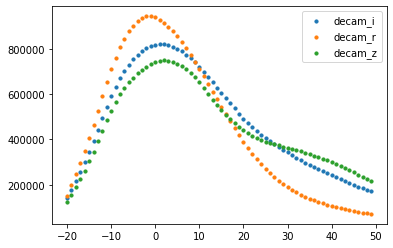

In [4]:
modeled_lc = sim_lc(z=.5, pwv=8)

for band, band_data in modeled_lc.to_pandas().groupby('band'):
    plt.scatter(band_data['time'], band_data['flux'], label=band, s=10)

plt.legend()


In [5]:
modeled_lc

time,flux,band,fluxerr,zpsys,zp
int64,float64,str7,float64,str2,int64
-20,152735.47229184856,decam_r,15273.547229184856,ab,25
-19,198054.52049084823,decam_r,19805.452049084823,ab,25
-18,246506.23083813125,decam_r,24650.623083813127,ab,25
-17,296701.58465779515,decam_r,29670.158465779517,ab,25
-16,349318.36336846236,decam_r,34931.83633684624,ab,25
-15,404617.1375530651,decam_r,40461.71375530651,ab,25
-14,463053.93825566076,decam_r,46305.393825566076,ab,25
-13,525425.0954370517,decam_r,52542.50954370518,ab,25
-12,590356.5102762054,decam_r,59035.65102762054,ab,25


In [7]:
lc_with_ref = reference.subtract_ref_from_lc(modeled_lc, 10)
lc_with_ref


time,flux,band,fluxerr,zpsys,zp,scale
int64,float64,str7,float64,str2,int64,float64
-20,153277.6732107764,decam_r,15273.547229184856,ab,25,0.9964626229797848
-19,198757.60106143606,decam_r,19805.452049084823,ab,25,0.9964626229797848
-18,247381.31180574358,decam_r,24650.623083813127,ab,25,0.9964626229797848
-17,297754.85584250995,decam_r,29670.158465779517,ab,25,0.9964626229797848
-16,350558.42066998326,decam_r,34931.83633684624,ab,25,0.9964626229797848
-15,406053.50187959184,decam_r,40461.71375530651,ab,25,0.9964626229797848
-14,464697.74939571886,decam_r,46305.393825566076,ab,25,0.9964626229797848
-13,527290.3200983495,decam_r,52542.50954370518,ab,25,0.9964626229797848
-12,592452.2372056717,decam_r,59035.65102762054,ab,25,0.9964626229797848
